# Life Expectancy 

## Datasets

Main: 

https://www.kaggle.com/kumarajarshi/life-expectancy-who

Cleaning: 

https://data.worldbank.org/indicator/SH.IMM.HEPB   (Hepatitis B)

https://data.worldbank.org/indicator/NY.GDP.PCAP.CD  (GDP) 

https://data.worldbank.org/indicator/sp.pop.totl  (Population) 

http://gamapserver.who.int/gho/interactive_charts/ncd/risk_factors/bmi/tablet/atlas.html  (BMI)

Additional: 

https://www.kaggle.com/statchaitya/country-to-continent  (Continent)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_temp = pd.read_csv('life-expectancy-who.zip')
#df_temp =pd.read_csv("Life Expectancy Data.csv")

In [3]:
df_temp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
print(list(df_temp.columns))

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [5]:
df = df_temp.rename(columns=lambda x: x.strip())  #Stripping white space from column names

In [6]:
print(list(df.columns))

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [7]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

### Column Descriptions
COUNTRY:  Country

YEAR:  Year

STATUS:  Developed or Developing status

LIFE EXPECTANCY:  Life Expectancy in age

ADULT MORTALITY:  Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

INFANT DEATHS:  Number of Infant Deaths per 1000 population

ALCOHOL:  Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

PERCENTAGE EXPENDITURE:  Expenditure on health as a percentage of Gross Domestic Product per capita(%)

HEPATITIS B (HepB):  immunization coverage among 1-year-olds (%)

MEASLES:  Measles - number of reported cases per 1000 population

BMI:  Average Body Mass Index of entire population

UNDER-FIVE DEATHS:  Number of under-five deaths per 1000 population

POLIO:  Polio (Pol3) immunization coverage among 1-year-olds (%)

TOTAL EXPENDITURE:  General government expenditure on health as a percentage of total government expenditure (%)

DIPTHERIA:  Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS:  Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP:  Gross Domestic Product per capita (in USD)

POPULATION:  Population of the country

THINNESS 1-19 YEARS:  Prevalence of thinness among children and adolescents for Age 10 to 19 (%)

THINNESS 5-9 YEARS:  Prevalence of thinness among children for Age 5 to 9(%)

INCOME COMPOSITION OF RESOURCES:  Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

SCHOOLING:  Number of years of Schooling (years)

In [8]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


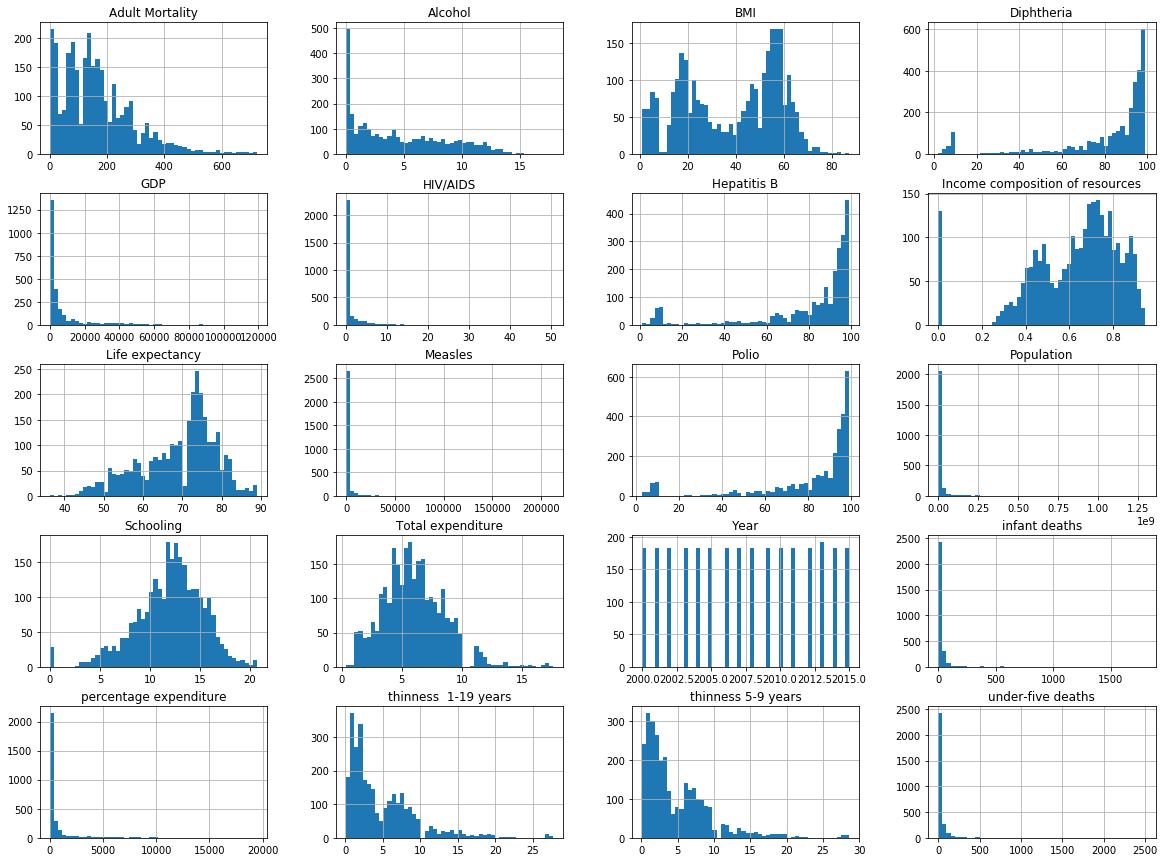

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

### Data Cleaning

In [10]:
df.isnull().sum()  # Checking for missing values

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
df.isnull().sum() * 100/df['Country'].count() # Percentage of null

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [12]:
df[df["Life expectancy"].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [13]:
df['Country'].nunique()

193

In [14]:
df2 = df.groupby('Country')['Year'].nunique()
df2

Country
Afghanistan                           16
Albania                               16
Algeria                               16
Angola                                16
Antigua and Barbuda                   16
                                      ..
Venezuela (Bolivarian Republic of)    16
Viet Nam                              16
Yemen                                 16
Zambia                                16
Zimbabwe                              16
Name: Year, Length: 193, dtype: int64

In [15]:
df2[(df2 != 16)] # Finding countries with < 16 years of data

Country
Cook Islands             1
Dominica                 1
Marshall Islands         1
Monaco                   1
Nauru                    1
Niue                     1
Palau                    1
Saint Kitts and Nevis    1
San Marino               1
Tuvalu                   1
Name: Year, dtype: int64

It's noticed that the countries with < 16 years of data are the same countries with *null* `Life expectancy` data, and will be dropped from the analysis since they are missing *life expectancy* data.

In [16]:
df[df['Country'].isin(df2[(df2 != 16)].index.tolist())] # Finding countries that have < 16 years of data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [17]:
df = df[~df['Country'].isin(df2[(df2 != 16)].index.tolist())] #Removing countries with < 16 years of data

In [18]:
df['Country'].nunique()

183

The ratio of *null* values for `Hepatitis B`, `GDP` and `Population` are very high so these values will be filled using the external data sources below.

* `Hepatitis B` can be filled from another data source (https://data.worldbank.org/indicator/SH.IMM.HEPB)
* `GDP` (per capita) can be filled from another data source (https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)
* `Population` can be filled from another data source (https://data.worldbank.org/indicator/sp.pop.totl)

#### Filling  `Hepatitis B` from another data source

In [19]:
# Read secondary source of data
df_hep = pd.read_csv('API_SH.IMM.HEPB_DS2_en_csv_v2_515680.csv',header=2,index_col=0).rename(
    index={'Bahamas, The': 'Bahamas',
           'Bolivia':'Bolivia (Plurinational State of)',
           "Cote d'Ivoire":"Côte d'Ivoire",
           'Congo, Rep.':'Congo',
           'Congo, Dem. Rep.':'Democratic Republic of the Congo',
           'Czech Republic':'Czechia',
           'Korea, Dem. People’s Rep.':"Democratic People's Republic of Korea",
           'Egypt, Arab Rep.':'Egypt',
           'Gambia, The':'Gambia',
           'Iran, Islamic Rep.':'Iran (Islamic Republic of)',
           'Kyrgyz Republic':'Kyrgyzstan',
           'Lao PDR':"Lao People's Democratic Republic",
           'Micronesia, Fed. Sts.':'Micronesia (Federated States of)',
           'Korea, Rep.':'Republic of Korea',
           'Moldova':'Republic of Moldova',
           'St. Lucia':'Saint Lucia',
           'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
           'Slovak Republic':'Slovakia',
           'North Macedonia':'The former Yugoslav republic of Macedonia',
           'United Kingdom':'United Kingdom of Great Britain and Northern Ireland',
           'Tanzania':'United Republic of Tanzania',
           'United States':'United States of America',
           'Venezuela, RB':'Venezuela (Bolivarian Republic of)',
           'Vietnam':'Viet Nam',
           'Yemen, Rep.':'Yemen'
          })

# The following countries are missing data. Filling NaN with mean
fillNaNCountryList = ['Algeria','Angola','Antigua and Barbuda','Argentina','Australia','Azerbaijan','Bahamas','Bangladesh','Barbados','Benin','Bosnia and Herzegovina','Burkina Faso','Burundi',
                      "Côte d'Ivoire",'Cabo Verde','Cambodia','Cameroon','Canada','Central African Republic','Chad','Chile','Comoros','Congo','Croatia','Czechia',
                      "Democratic People's Republic of Korea",'Democratic Republic of the Congo','Djibouti','Equatorial Guinea','Eritrea','Estonia','Ethiopia',
                      'Gabon','Ghana','Grenada','Guatemala','Guinea','Guinea-Bissau','Guyana','Haiti','India','Ireland','Jamaica','Kenya',"Lao People's Democratic Republic",'Lesotho','Liberia',
                      'Madagascar','Malawi','Mali','Malta','Mauritania','Montenegro','Mozambique','Myanmar','Namibia','Nepal','Netherlands','Niger','Nigeria','Pakistan','Panama','Paraguay','Peru',
                      'Russian Federation','Rwanda','Saint Lucia','Saint Vincent and the Grenadines','Sao Tome and Principe','Senegal','Serbia','Sierra Leone','Somalia','South Sudan','Sri Lanka','Sudan','Suriname','Sweden','Switzerland',
                      'Tajikistan','The former Yugoslav republic of Macedonia','Timor-Leste','Togo','Trinidad and Tobago','Turkmenistan','Uganda','United Republic of Tanzania','Uzbekistan','Viet Nam','Zambia']
for country in fillNaNCountryList:
    df_hep.loc[country] = df_hep.loc[country].fillna(value=df_hep.drop(columns=['Country Code','Indicator Name','Indicator Code']).loc[country].mean())

# The following countries are completely missing data. However they are all well-developed european countries (except japan). Will use average of data from a similar country 'Netherlands'
fillNaNCountryList = ['Denmark','Finland','Hungary','Iceland','Japan','Norway','Slovenia','United Kingdom of Great Britain and Northern Ireland']
for country in fillNaNCountryList:
    df_hep.loc[country] = df_hep.loc[country].fillna(value=df_hep.drop(columns=['Country Code','Indicator Name','Indicator Code']).loc['Netherlands'].mean())

# Create dict of indexes with null population and corresponding country,year
nullIdx = df[df["Hepatitis B"].isnull()][["Country","Year"]].T.to_dict()

# Set values for nulls
for i,countryYear in nullIdx.items():
    df.loc[i,"Hepatitis B"] = df_hep.loc[countryYear["Country"]][str(countryYear["Year"])]

#### Filling `Population` from another data source

In [20]:
# Read secondary source of data
df_pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_422125.csv',header=2,index_col=0).rename(
    index={'Bahamas, The': 'Bahamas',
           'Bolivia':'Bolivia (Plurinational State of)',
           "Cote d'Ivoire":"Côte d'Ivoire",
           'Congo, Rep.':'Congo',
           'Congo, Dem. Rep.':'Democratic Republic of the Congo',
           'Czech Republic':'Czechia',
           'Korea, Dem. People’s Rep.':"Democratic People's Republic of Korea",
           'Egypt, Arab Rep.':'Egypt',
           'Gambia, The':'Gambia',
           'Iran, Islamic Rep.':'Iran (Islamic Republic of)',
           'Kyrgyz Republic':'Kyrgyzstan',
           'Lao PDR':"Lao People's Democratic Republic",
           'Micronesia, Fed. Sts.':'Micronesia (Federated States of)',
           'Korea, Rep.':'Republic of Korea',
           'Moldova':'Republic of Moldova',
           'St. Lucia':'Saint Lucia',
           'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
           'Slovak Republic':'Slovakia',
           'North Macedonia':'The former Yugoslav republic of Macedonia',
           'United Kingdom':'United Kingdom of Great Britain and Northern Ireland',
           'Tanzania':'United Republic of Tanzania',
           'United States':'United States of America',
           'Venezuela, RB':'Venezuela (Bolivarian Republic of)',
           'Vietnam':'Viet Nam',
           'Yemen, Rep.':'Yemen'
          })
# Eritrea - missing data. Filling NaN with mean
df_pop.loc['Eritrea'] = df_pop.loc['Eritrea'].fillna(value=df_pop.drop(columns=['Country Code','Indicator Name','Indicator Code','Unnamed: 64']).loc['Eritrea'].mean())

# Create dict of indexes with null population and corresponding country,year
nullIdx = df[df["Population"].isnull()][["Country","Year"]].T.to_dict()

# Set values for population nulls
for i,countryYear in nullIdx.items():
    df.loc[i,"Population"] = df_pop.loc[countryYear["Country"]][str(countryYear["Year"])]

#### Filling `GDP` (per capita) from another data source

In [21]:
# Read secondary source of data
df_gdp = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_511373.csv',header=2,index_col=0).rename(
    index={'Bahamas, The': 'Bahamas',
           'Bolivia':'Bolivia (Plurinational State of)',
           "Cote d'Ivoire":"Côte d'Ivoire",
           'Congo, Rep.':'Congo',
           'Congo, Dem. Rep.':'Democratic Republic of the Congo',
           'Czech Republic':'Czechia',
           'Korea, Dem. People’s Rep.':"Democratic People's Republic of Korea",
           'Egypt, Arab Rep.':'Egypt',
           'Gambia, The':'Gambia',
           'Iran, Islamic Rep.':'Iran (Islamic Republic of)',
           'Kyrgyz Republic':'Kyrgyzstan',
           'Lao PDR':"Lao People's Democratic Republic",
           'Micronesia, Fed. Sts.':'Micronesia (Federated States of)',
           'Korea, Rep.':'Republic of Korea',
           'Moldova':'Republic of Moldova',
           'St. Lucia':'Saint Lucia',
           'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
           'Slovak Republic':'Slovakia',
           'North Macedonia':'The former Yugoslav republic of Macedonia',
           'United Kingdom':'United Kingdom of Great Britain and Northern Ireland',
           'Tanzania':'United Republic of Tanzania',
           'United States':'United States of America',
           'Venezuela, RB':'Venezuela (Bolivarian Republic of)',
           'Vietnam':'Viet Nam',
           'Yemen, Rep.':'Yemen'
          })
# The following countries are missing data. Filling NaN with mean
fillNaNCountryList = ['Eritrea', 'Iraq', 'Sao Tome and Principe', 'Somalia', 'South Sudan', 'Syrian Arab Republic', 'Venezuela (Bolivarian Republic of)']
for country in fillNaNCountryList:
    df_gdp.loc[country] = df_gdp.loc[country].fillna(value=df_gdp.drop(columns=['Country Code','Indicator Name','Indicator Code']).loc[country].mean())
# Special case, filling North Korea with GDP/cap from https://www.cia.gov/library/publications/the-world-factbook/geos/kn.html
df_gdp.loc["Democratic People's Republic of Korea"] = df_gdp.loc["Democratic People's Republic of Korea"].fillna(value=1700)

# Create dict of indexes with null population and corresponding country,year
nullIdx = df[df["GDP"].isnull()][["Country","Year"]].T.to_dict()

# Set values for nulls
for i,countryYear in nullIdx.items():
    df.loc[i,"GDP"] = df_gdp.loc[countryYear["Country"]][str(countryYear["Year"])]

In [22]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

#### Filling *nulls* in `Alcohol`

In [23]:
# Impute alcohol means by country
impute_alcohol = df.groupby('Country').mean()["Alcohol"].to_dict()

# Create dict of indexes with null alcohol and corresponding country
nullIdx = df[df["Alcohol"].isnull()]["Country"].to_dict()

# set values for alcohol nulls
for i,country in nullIdx.items():
    df.loc[i,"Alcohol"] = impute_alcohol[country]
    
# checking for other nulls
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].mean())

In [24]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

#### Filling *nulls* in `BMI` and correcting *BMI < 10*

In [25]:
df["BMI"].fillna(value=24.7,inplace=True)

In [26]:
# Filling bad values with NaN to reduce skewing the mean calculation
for i in df[df["BMI"] < 10].index:
    df.loc[i,"BMI"] = float('NaN')

# Create dict of indexes with bad values
nullIdx = df[df["BMI"].isnull()]["Country"].to_dict()

# Impute BMI means by country
impute_BMI = df.groupby('Country').mean()["BMI"].to_dict()

# Fill with imputed data
for i,country in nullIdx.items():
    df.loc[i,"BMI"] = impute_BMI[country]

In [27]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

#### Using interpolation to fill missing values for the remaining features 

In [28]:
df = df.interpolate(method ='linear', limit_direction ='forward') 

In [29]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

## Exploratory Analysis

In [30]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1,0.170033,-0.0790516,-0.036464,-0.0441635,0.0327226,0.102514,-0.0818403,0.143211,-0.0419799,0.0959121,0.0726587,0.135645,-0.138789,0.10459,0.0195394,-0.0352596,-0.0373674,0.226031,0.190335
Life expectancy,0.170033,1,-0.696359,-0.196557,0.404915,0.381864,0.252531,-0.157586,0.719826,-0.222529,0.460816,0.213579,0.47506,-0.556556,0.475185,0.00713604,-0.478476,-0.474138,0.691405,0.707392
Adult Mortality,-0.0790516,-0.696359,1,0.078756,-0.197621,-0.24286,-0.152445,0.0311764,-0.490244,0.0941461,-0.27307,-0.115147,-0.273817,0.523821,-0.313386,-0.0320731,0.307909,0.314972,-0.442298,-0.434357
infant deaths,-0.036464,-0.196557,0.078756,1,-0.11683,-0.0859058,-0.207749,0.501038,-0.289582,0.996628,-0.169752,-0.126479,-0.174304,0.0249547,-0.112244,0.513162,0.462903,0.467388,-0.132837,-0.175433
Alcohol,-0.0441635,0.404915,-0.197621,-0.11683,1,0.33027,0.0590906,-0.0543324,0.428786,-0.113417,0.226741,0.296176,0.220569,-0.0500703,0.388531,-0.0130409,-0.434429,-0.422832,0.446318,0.514599
percentage expenditure,0.0327226,0.381864,-0.24286,-0.0859058,0.33027,1,-0.0194537,-0.0568305,0.277085,-0.0881522,0.14799,0.172685,0.144417,-0.0982298,0.833669,-0.044853,-0.253366,-0.254852,0.359709,0.371453
Hepatitis B,0.102514,0.252531,-0.152445,-0.207749,0.0590906,-0.0194537,1,-0.118788,0.198614,-0.217441,0.461032,0.0665144,0.556114,-0.1112,0.0419854,-0.0906175,-0.11513,-0.119894,0.170238,0.206116
Measles,-0.0818403,-0.157586,0.0311764,0.501038,-0.0543324,-0.0568305,-0.118788,1,-0.225849,0.507718,-0.135354,-0.102347,-0.14106,0.0306734,-0.0806093,0.232255,0.222141,0.217687,-0.0879878,-0.0838815
BMI,0.143211,0.719826,-0.490244,-0.289582,0.428786,0.277085,0.198614,-0.225849,1,-0.30355,0.35505,0.301982,0.358939,-0.305155,0.389029,-0.0569167,-0.669782,-0.672277,0.596354,0.655334
under-five deaths,-0.0419799,-0.222529,0.0941461,0.996628,-0.113417,-0.0881522,-0.217441,0.507718,-0.30355,1,-0.187752,-0.128085,-0.194782,0.0377832,-0.116486,0.500123,0.465232,0.468593,-0.150304,-0.190525


Variables that have > 0.6 correlation with `Life Expectancy`: 

* `Adult Mortality`
* `Income composition of resources`
* `Schooling`

Variables that seem to be highly correlated with each other: 
* `under-five deaths` & `infant deaths` - these attributes could be merged into an engineered attribute `pct_infantDeaths`
* `GDP` & `percentage expenditure`
* `thinness 1-19 year` & `thinness 5-9 years` - these attributes could be merged into an engineered attribute `pct_thinness`
* `Income composition of resources` & `Schooling`

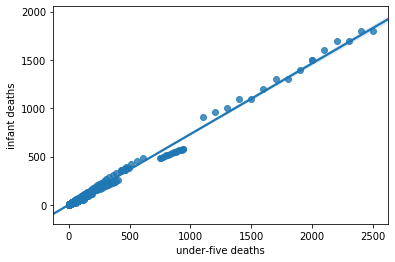

In [31]:
sns.regplot(df["under-five deaths"],df["infant deaths"]) # Verifying correlation

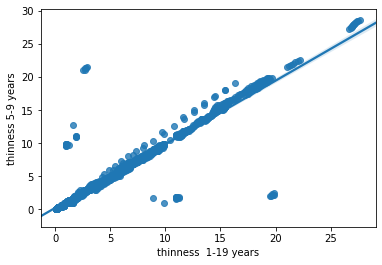

In [32]:
sns.regplot(df["thinness  1-19 years"],df["thinness 5-9 years"]) # Verifying correlation

#### Merging `under-five deaths` and `infant deaths` into `pct_infantDeaths`

In [33]:
df['pct_infantDeaths'] = df[["under-five deaths","infant deaths"]].mean(axis=1)*100/1000
df.drop(columns=["under-five deaths","infant deaths"],inplace=True)

#### Merging `thinness  1-19 years` and `thinness 5-9 years` into `pct_thinness`

In [34]:
df['pct_thinness'] = df[["thinness  1-19 years","thinness 5-9 years"]].mean(axis=1)
df.drop(columns=["thinness  1-19 years","thinness 5-9 years"],inplace=True)

In [35]:
df.groupby(['Country', 'Year']).mean()

Life expectancy  Adult Mortality  Alcohol  \
Country     Year                                              
Afghanistan 2000             54.8            321.0    0.010   
            2001             55.3            316.0    0.010   
            2002             56.2              3.0    0.010   
            2003             56.7            295.0    0.010   
            2004             57.0            293.0    0.020   
...                           ...              ...      ...   
Zimbabwe    2011             54.9            464.0    6.000   
            2012             56.6            429.0    6.090   
            2013             58.0            399.0    6.390   
            2014             59.2            371.0    6.500   
            2015             67.0            336.0    4.482   

                  percentage expenditure  Hepatitis B  Measles        BMI  \
Country     Year                                                            
Afghanistan 2000               10.424960         62.0     6532  12.200000   
            2001               10.574728         63.0     8762  12.600000   
            2002               16.887351         64.0     2486  13.000000   
            2003               11.089053         65.0      798  13.400000   
            2004               15.296066         67.0      466  13.800000   
...                                  ...          ...      ...        ...   
Zimbabwe    2011               63.750530         94.0        0  29.900000   
            2012               92.602336         97.0        0  28.221429   
            2013               10.666707         95.0        0  28.221429   
            2014               10.822595         91.0        0  31.300000   
            2015                0.000000         87.0        0  31.800000   

                  Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  \
Country     Year                                                               
Afghanistan 2000   24.0               8.20        24.0       0.1  114.560000   
            2001   35.0               7.80        33.0       0.1  117.496980   
            2002   36.0               7.76        36.0       0.1  187.845950   
            2003   41.0               8.82        41.0       0.1  198.728544   
            2004    5.0               8.79         5.0       0.1  219.141353   
...                 ...                ...         ...       ...         ...   
Zimbabwe    2011   93.0               6.31        93.0      13.3  839.927936   
            2012   95.0               6.69        95.0       8.8  955.648466   
            2013   95.0               6.88        95.0       6.8  111.227396   
            2014   92.0               6.44        91.0       6.3  127.474620   
            2015   88.0               6.80        87.0       6.2  118.693830   

                  Population  Income composition of resources  Schooling  \
Country     Year                                                           
Afghanistan 2000    293756.0                            0.338        5.5   
            2001   2966463.0                            0.340        5.9   
            2002  21979923.0                            0.341        6.2   
            2003   2364851.0                            0.373        6.5   
            2004  24118979.0                            0.381        6.8   
...                      ...                              ...        ...   
Zimbabwe    2011  14386649.0                            0.452       10.1   
            2012   1471826.0                            0.464        9.8   
            2013    155456.0                            0.488       10.4   
            2014  15411675.0                            0.498       10.3   
            2015  15777451.0                            0.507       10.3   

                  pct_infantDeaths  pct_thinness  
Country     Year                                  
Afghanistan 2000             10.50          2.40  
            2

#### Adding Continent Data

In [36]:
cont_temp = pd.read_csv('country-to-continent.zip', encoding='latin-1') # Encoding due to unicode error
cont = cont_temp.rename(columns={"country": "Country"}) 
print(list(cont.columns))

['Country', 'code_2', 'code_3', 'country_code', 'iso_3166_2', 'continent', 'sub_region', 'region_code', 'sub_region_code']


In [37]:
df3 = pd.merge(df, cont, on=['Country'])
df3.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,pct_infantDeaths,pct_thinness,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,...,7.25,17.25,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Afghanistan,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,...,7.50,17.50,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,...,7.75,17.70,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
3,Afghanistan,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,...,8.10,17.95,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,...,8.40,18.20,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0


In [38]:
df3['continent'].isnull().sum() # Checking if any countries have missing continents 

0

In [39]:
df = df3

In [40]:
cont = df.groupby(['continent']).mean().reset_index()
cont.head()

,continent,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,...,HIV/AIDS,GDP,Population,Income composition of resources,Schooling,pct_infantDeaths,pct_thinness,country_code,region_code,sub_region_code
0,Africa,2007.5,58.718269,265.866587,2.695464,112.859035,73.060520,3254.579327,25.804347,71.214543,...,5.459135,1549.615770,9.872800e+06,0.464363,9.224639,5.051803,7.282752,456.730769,2.0,14.038462
1,Americas,2007.5,73.485417,130.846591,5.981495,480.566190,82.860657,20.257576,50.525153,85.147727,...,0.394508,7344.341889,1.835621e+07,0.672710,12.856876,0.853125,2.545928,367.545455,19.0,15.909091
2,Asia,2007.5,71.032639,134.101389,1.961131,483.274984,83.081667,4364.500000,37.386703,85.195833,...,0.157222,6647.372784,2.475742e+07,0.643231,11.752083,7.238958,7.619653,431.355556,142.0,88.022222
3,Europe,2007.5,77.748437,96.654514,9.652500,2291.257257,80.549197,523.013889,57.672559,92.984375,...,0.116667,18089.622136,9.882719e+06,0.812353,15.204461,0.137066,1.507465,427.944444,150.0,118.388889
4,Oceania,2007.5,71.214375,135.087500,2.942958,951.878720,73.528819,262.918750,59.812238,78.125000,...,0.206875,6391.521534,1.502720e+06,0.615331,12.979375,0.133750,0.970625,460.500000,9.0,55.800000


Text(0.5, 1.0, 'Life Expectancy by Continent')

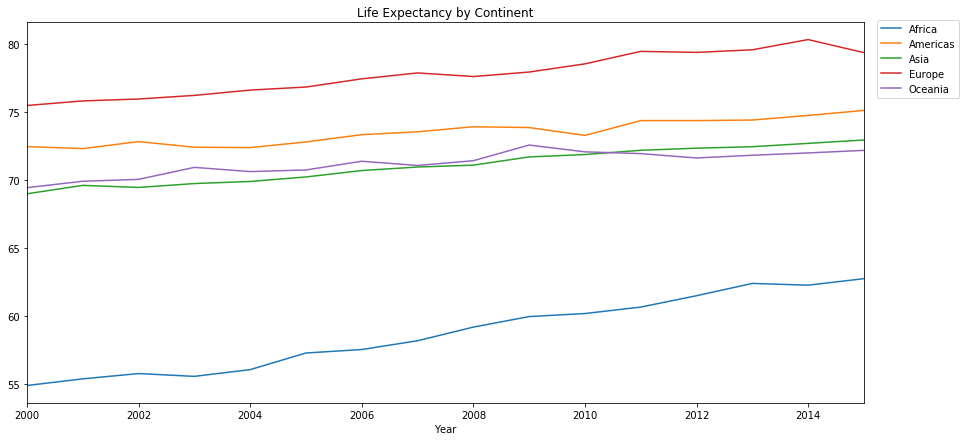

In [41]:
fig, ax = plt.subplots(figsize=(15,7))
df3.groupby(['Year','continent']).mean()['Life expectancy'].unstack().plot(ax=ax)
plt.legend(loc='upper right', bbox_to_anchor=(1.12, 1.02))
plt.title('Life Expectancy by Continent')

Text(0.5, 1.0, 'Life Expectancy by Sub Region')

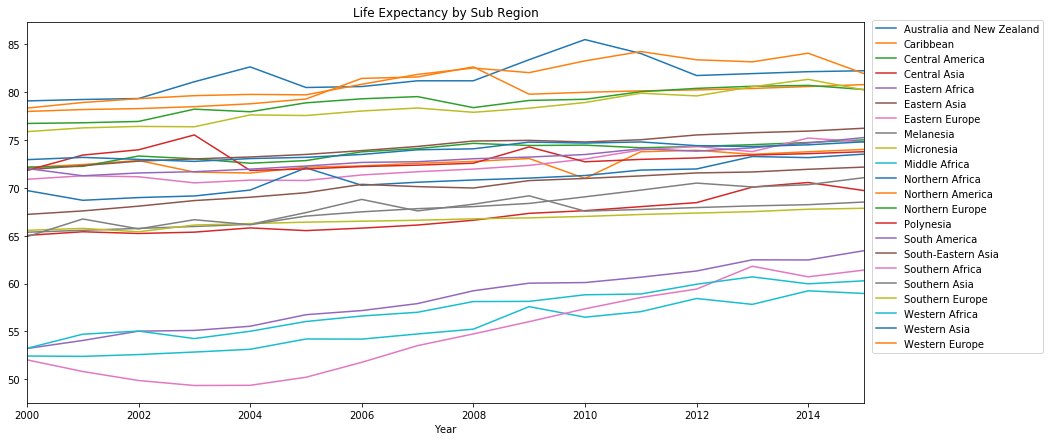

In [42]:
fig, ax = plt.subplots(figsize=(15,7))
df3.groupby(['Year','sub_region']).mean()['Life expectancy'].unstack().plot(ax=ax)
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1.02))
plt.title('Life Expectancy by Sub Region')

In [43]:
df = df3

In [44]:
#df_BMI = cont.groupby('continent').mean().reset_index()

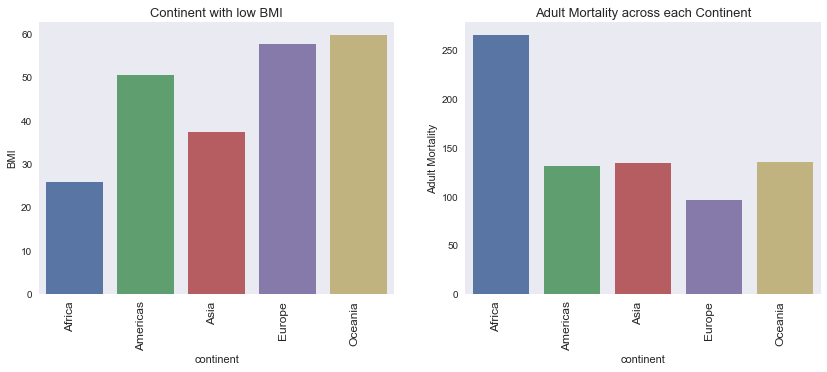

In [45]:
# Visualizing 10 countries with lowest BMI using barplots.

plt.figure(figsize=(14,5))
sns.set(style='dark')

plt.subplot(1,2,1)
plot1 = sns.barplot(data=cont,x=cont.continent,y=cont['BMI'])
plot1.set_title("Continent with low BMI",fontsize=13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.subplot(1,2,2)
plot2 = sns.barplot(data=cont,x=cont.continent,y=cont['Adult Mortality'])
plot2.set_title("Adult Mortality across each Continent",fontsize=13)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90, ha="right", fontsize=12)


plt.show()

In [46]:
#df_POLIO = df.groupby('Country').mean().nsmallest(10,'Polio').reset_index()
#df_HEP = df.groupby('Country').mean().nsmallest(10,'Hepatitis B').reset_index()
#df_HIV = df.groupby('Country').mean().nsmallest(10,'HIV/AIDS').reset_index()

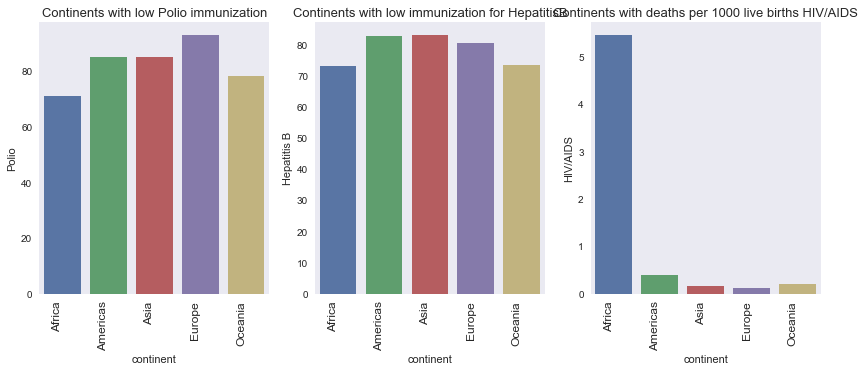

In [47]:
# Visualizing 10 countries with lowest percentange of Polio (Pol3) immunization coverage among 1-year-olds (%)" using barplots.

plt.figure(figsize=(14,5))
sns.set(style='dark')

plt.subplot(1,3,1)
plot1 = sns.barplot(data=cont,x=cont.continent,y=cont['Polio'])
plot1.set_title("Continents with low Polio immunization",fontsize=13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.subplot(1,3,2)
plot1 = sns.barplot(data=cont,x=cont.continent,y=cont['Hepatitis B'])
plot1.set_title("Continents with low immunization for HepatitisB",fontsize=13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.subplot(1,3,3)
plot1 = sns.barplot(data=cont,x=cont.continent,y=cont['HIV/AIDS'])
plot1.set_title("Continents with deaths per 1000 live births HIV/AIDS",fontsize=13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.show()

In [48]:
#df_THIN = df.groupby('Country').mean().nlargest(10,'pct_thinness').reset_index()

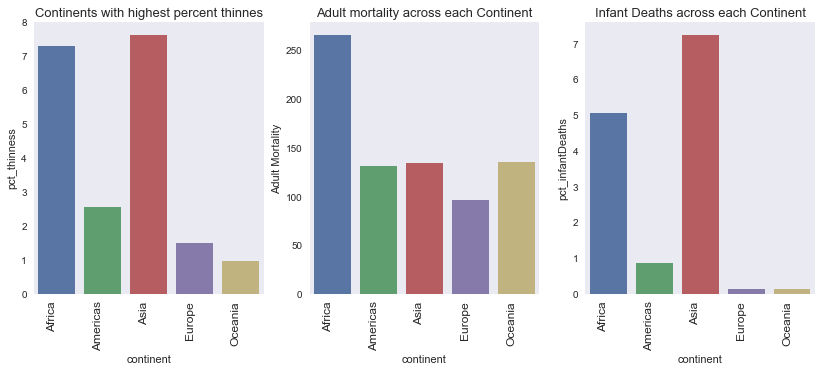

In [49]:
# Visualizing 10 countries with lowest pct_thinnes using barplots.

plt.figure(figsize=(14,5))
sns.set(style='dark')

plt.subplot(1,3,1)
plot1 = sns.barplot(data=cont,x=cont.continent,y=cont['pct_thinness'])
plot1.set_title("Continents with highest percent thinnes",fontsize=13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.subplot(1,3,2)
plot2 = sns.barplot(data=cont,x=cont.continent,y=cont['Adult Mortality'])  #pct_infantDeaths
plot2.set_title("Adult mortality across each Continent",fontsize=13)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.subplot(1,3,3)
plot2 = sns.barplot(data=cont,x=cont.continent,y=cont['pct_infantDeaths'])
plot2.set_title("Infant Deaths across each Continent",fontsize=13)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90, ha="right", fontsize=12)


plt.show()

In [50]:
#df_GDP = df.groupby('Country').mean().nsmallest(10,'GDP').reset_index()

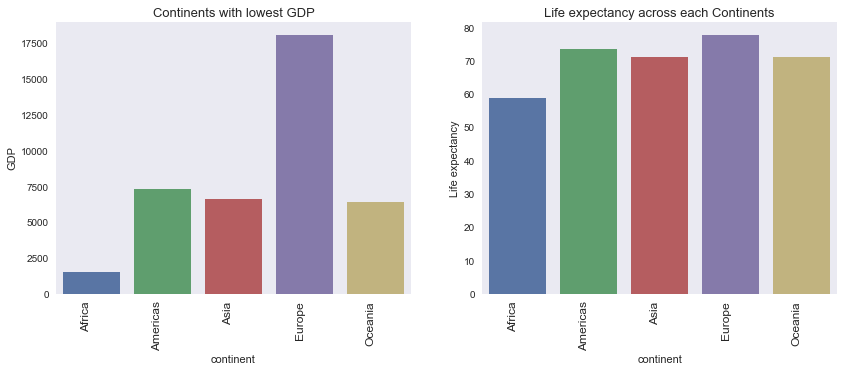

In [51]:
# Visualizing 10 countries with lowest percentange of immunization coverage for "HepatitisB" using barplots.

plt.figure(figsize=(14,5))
sns.set(style='dark')

plt.subplot(1,2,1)
plot1 = sns.barplot(data=cont,x=cont.continent,y=cont['GDP'])
plot1.set_title("Continents with lowest GDP",fontsize=13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.subplot(1,2,2)
plot2 = sns.barplot(data=cont,x=cont.continent,y=cont['Life expectancy'])
plot2.set_title("Life expectancy across each Continents",fontsize=13)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.show()

In [52]:
#df_ICR = df.groupby('Country').mean().nsmallest(10,'Income composition of resources').reset_index()

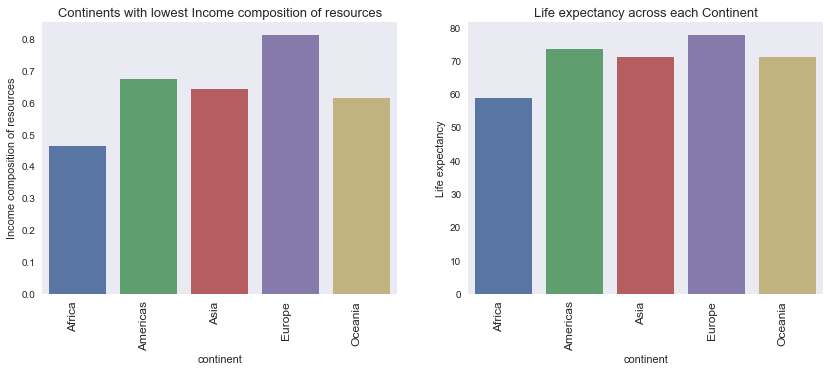

In [53]:
plt.figure(figsize=(14,5))
sns.set(style='dark')

plt.subplot(1,2,1)
plot1 = sns.barplot(data=cont,x=cont.continent,y=cont['Income composition of resources'])
plot1.set_title("Continents with lowest Income composition of resources",fontsize=13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.subplot(1,2,2)
plot2 = sns.barplot(data=cont,x=cont.continent,y=cont['Life expectancy'])
plot2.set_title("Life expectancy across each Continent",fontsize=13)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90, ha="right", fontsize=12)


plt.show()

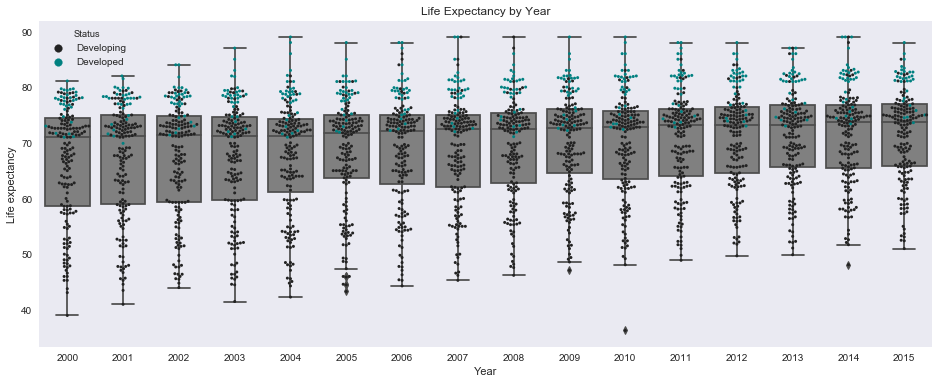

In [54]:
plt.figure(figsize=(16, 6))
plt.title('Life Expectancy by Year')
ax = sns.boxplot(x='Year', y='Life expectancy', data=df, color='grey')
# Add jitter with the swarmplot function.
ax = sns.swarmplot(x='Year', y='Life expectancy', data=df, color='teal', hue='Status', size=3)

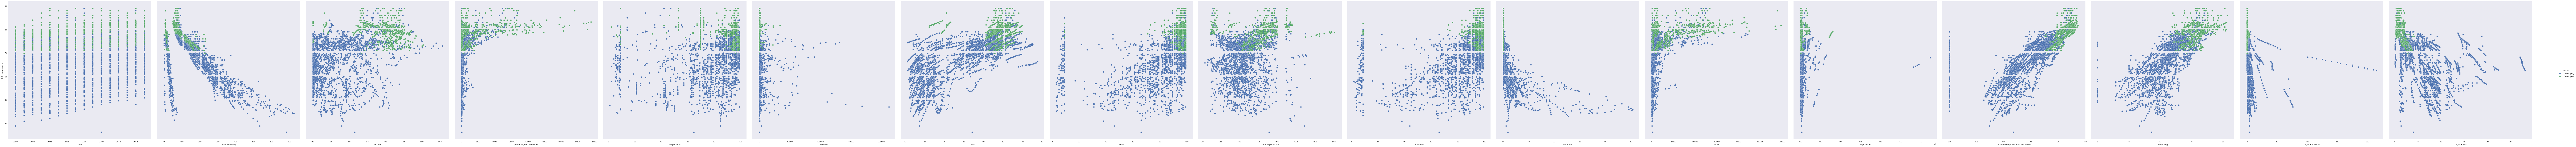

In [55]:
sns.pairplot(df, x_vars=['Year', 'Adult Mortality', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Income composition of resources', 'Schooling', 'pct_infantDeaths', 'pct_thinness'], y_vars = ['Life expectancy'], hue='Status', size=10)


In [56]:
# Averaging immunization records since they are all correlated with each other 

df['Immunization'] = (df['Hepatitis B'] + df['Polio'] + df['Diphtheria'])/3
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,pct_thinness,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code,Immunization
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,...,17.25,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,45.333333
1,Afghanistan,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,...,17.50,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,60.666667
2,Afghanistan,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,...,17.70,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,63.333333
3,Afghanistan,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,...,17.95,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,67.000000
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,...,18.20,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,68.000000


In [63]:
df = df.drop(columns=['Hepatitis B', 'Polio', 'Diphtheria'])

In [59]:
df_IMM = df.groupby('continent').mean().reset_index()

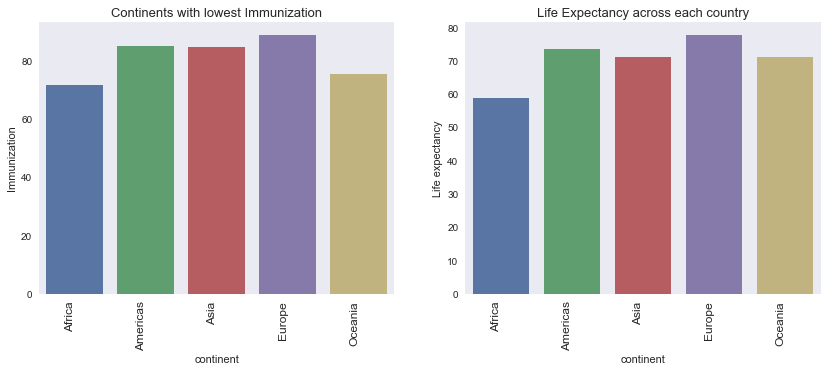

In [60]:
plt.figure(figsize=(14,5))
sns.set(style='dark')

plt.subplot(1,2,1)
plot1 = sns.barplot(data=df_IMM,x=df_IMM.continent,y=df_IMM['Immunization'])
plot1.set_title("Continents with lowest Immunization",fontsize=13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.subplot(1,2,2)
plot2 = sns.barplot(data=df_IMM,x=df_IMM.continent,y=df_IMM['Life expectancy'])
plot2.set_title("Life Expectancy across each country",fontsize=13)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.show()

## Linear Regression

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression

In [67]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,Total expenditure,...,pct_thinness,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code,Immunization
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,1154,19.1,8.16,...,17.25,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,45.333333
1,Afghanistan,2014,Developing,59.9,271.0,0.01,73.523582,492,18.6,8.18,...,17.50,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,60.666667
2,Afghanistan,2013,Developing,59.9,268.0,0.01,73.219243,430,18.1,8.13,...,17.70,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,63.333333
3,Afghanistan,2012,Developing,59.5,272.0,0.01,78.184215,2787,17.6,8.52,...,17.95,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,67.000000
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.097109,3013,17.2,7.87,...,18.20,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0,68.000000


In [68]:
df_dummy_status = pd.get_dummies(df['Status'],prefix_sep='_', drop_first=True)
df_dummy_cont = pd.get_dummies(df['continent'], drop_first=True)

df_temp = df.drop(columns=['Country', 'continent', 'Status'])

df_final = pd.concat([df_temp, df_dummy_status, df_dummy_cont], axis=1)
print(df_final.columns)

df_final.head()

Index(['Year', 'Life expectancy', 'Adult Mortality', 'Alcohol',
       'percentage expenditure', 'Measles', 'BMI', 'Total expenditure',
       'HIV/AIDS', 'GDP', 'Population', 'Income composition of resources',
       'Schooling', 'pct_infantDeaths', 'pct_thinness', 'code_2', 'code_3',
       'country_code', 'iso_3166_2', 'sub_region', 'region_code',
       'sub_region_code', 'Immunization', 'Developing', 'Americas', 'Asia',
       'Europe', 'Oceania'],
      dtype='object')


,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,Total expenditure,HIV/AIDS,GDP,...,iso_3166_2,sub_region,region_code,sub_region_code,Immunization,Developing,Americas,Asia,Europe,Oceania
0,2015,65.0,263.0,0.01,71.279624,1154,19.1,8.16,0.1,584.259210,...,ISO 3166-2:AF,Southern Asia,142.0,34.0,45.333333,1,0,1,0,0
1,2014,59.9,271.0,0.01,73.523582,492,18.6,8.18,0.1,612.696514,...,ISO 3166-2:AF,Southern Asia,142.0,34.0,60.666667,1,0,1,0,0
2,2013,59.9,268.0,0.01,73.219243,430,18.1,8.13,0.1,631.744976,...,ISO 3166-2:AF,Southern Asia,142.0,34.0,63.333333,1,0,1,0,0
3,2012,59.5,272.0,0.01,78.184215,2787,17.6,8.52,0.1,669.959000,...,ISO 3166-2:AF,Southern Asia,142.0,34.0,67.000000,1,0,1,0,0
4,2011,59.2,275.0,0.01,7.097109,3013,17.2,7.87,0.1,63.537231,...,ISO 3166-2:AF,Southern Asia,142.0,34.0,68.000000,1,0,1,0,0


In [69]:
corr = df_final.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,Total expenditure,HIV/AIDS,GDP,Population,Income composition of resources,Schooling,pct_infantDeaths,pct_thinness,country_code,region_code,sub_region_code,Immunization,Developing,Americas,Asia,Europe,Oceania
Year,1,0.167397,-0.0770023,-0.0423746,0.0334591,-0.0916192,0.144506,0.0730238,-0.137495,0.102546,0.0184325,0.22911,0.201078,-0.0400762,-0.0332025,-3.01727e-18,-1.27786e-19,-2.30435e-19,0.133864,-2.24515e-19,0,3.4701e-17,1.69623e-19,-6.46539e-19
Life expectancy,0.167397,1,-0.695232,0.40062,0.3898,-0.141303,0.723539,0.204775,-0.555785,0.471258,0.0136662,0.731444,0.746612,-0.195484,-0.475976,-0.0493283,0.514968,0.434726,0.463493,-0.487262,0.214196,0.110412,0.45305,0.0509199
Adult Mortality,-0.0770023,-0.695232,1,-0.194539,-0.248001,0.0130381,-0.489373,-0.109277,0.525141,-0.309548,-0.0376046,-0.469443,-0.457835,0.0756265,0.310766,0.0606686,-0.384875,-0.304166,-0.268618,0.315313,-0.131115,-0.144641,-0.277707,-0.0586269
Alcohol,-0.0423746,0.40062,-0.194539,1,0.344454,-0.0397538,0.429815,0.29899,-0.044299,0.387829,-0.0108812,0.455166,0.534651,-0.105662,-0.432725,-0.0438771,0.236762,0.308221,0.190072,-0.599018,0.170465,-0.380625,0.644949,-0.0991982
percentage expenditure,0.0334591,0.3898,-0.248001,0.344454,1,-0.0555497,0.279735,0.175203,-0.100252,0.84001,-0.0421006,0.380343,0.389338,-0.0859695,-0.263421,-0.0296935,0.251967,0.312426,0.112219,-0.461658,-0.0686331,-0.0829522,0.381157,0.0220817
Measles,-0.0916192,-0.141303,0.0130381,-0.0397538,-0.0555497,1,-0.218807,-0.0872335,0.031395,-0.07749,0.240319,-0.13225,-0.138337,0.525415,0.231073,0.0025103,0.0261438,-0.08392,-0.141789,0.0745448,-0.100107,0.120923,-0.081335,-0.0454614
BMI,0.144506,0.723539,-0.489373,0.429815,0.279735,-0.218807,1,0.294099,-0.303109,0.392027,-0.044061,0.64319,0.698699,-0.287299,-0.686735,0.0294607,0.296572,0.50963,0.358163,-0.394615,0.239298,-0.150295,0.46076,0.253176
Total expenditure,0.0730238,0.204775,-0.109277,0.29899,0.175203,-0.0872335,0.294099,1,0.00546665,0.207422,0.0534941,0.186352,0.259106,-0.118011,-0.275307,0.0893249,0.00718381,0.0425389,0.130294,-0.303259,0.141121,-0.270936,0.26834,0.0516124
HIV/AIDS,-0.137495,-0.555785,0.525141,-0.044299,-0.100252,0.031395,-0.303109,0.00546665,1,-0.137878,-0.0370417,-0.255538,-0.222608,0.0266297,0.201688,0.0848746,-0.31804,-0.229891,-0.169343,0.149249,-0.127596,-0.182673,-0.162041,-0.0741321
GDP,0.102546,0.471258,-0.309548,0.387829,0.84001,-0.07749,0.392027,0.207422,-0.137878,1,0.0495235,0.463694,0.443108,-0.10943,-0.312851,0.0193979,0.290571,0.36544,0.180742,-0.506987,-0.00858976,-0.0392959,0.375306,-0.0208857


In [70]:
df_final[['code_2','code_3','sub_region','iso_3166_2', 'region_code', 'sub_region_code']].head()

,code_2,code_3,sub_region,iso_3166_2,region_code,sub_region_code
0,AF,AFG,Southern Asia,ISO 3166-2:AF,142.0,34.0
1,AF,AFG,Southern Asia,ISO 3166-2:AF,142.0,34.0
2,AF,AFG,Southern Asia,ISO 3166-2:AF,142.0,34.0
3,AF,AFG,Southern Asia,ISO 3166-2:AF,142.0,34.0
4,AF,AFG,Southern Asia,ISO 3166-2:AF,142.0,34.0


In [71]:
# Dropping, Code_2, code_3, iso_3166_2, and sub regions as these column have no use in predictive analysis. The code_2 and code_3 are pretty much same, 
# The feature iso_3166_2 is only for the documentation and is also same for most of the continents.
df_pred = df_final.drop(['code_2','code_3','sub_region','iso_3166_2', 'sub_region_code', 'Income composition of resources', 'percentage expenditure', 'region_code'], axis=1)


#### NOTE: Also removed `sub_region_code`, `Income composition of resources`, and `percentage expenditure` to remove some multicolinearity

In [72]:
corr2 = df_pred.corr()
corr2.style.background_gradient(cmap='coolwarm')

,Year,Life expectancy,Adult Mortality,Alcohol,Measles,BMI,Total expenditure,HIV/AIDS,GDP,Population,Schooling,pct_infantDeaths,pct_thinness,country_code,Immunization,Developing,Americas,Asia,Europe,Oceania
Year,1,0.167397,-0.0770023,-0.0423746,-0.0916192,0.144506,0.0730238,-0.137495,0.102546,0.0184325,0.201078,-0.0400762,-0.0332025,-3.01727e-18,0.133864,-2.24515e-19,0,3.4701e-17,1.69623e-19,-6.46539e-19
Life expectancy,0.167397,1,-0.695232,0.40062,-0.141303,0.723539,0.204775,-0.555785,0.471258,0.0136662,0.746612,-0.195484,-0.475976,-0.0493283,0.463493,-0.487262,0.214196,0.110412,0.45305,0.0509199
Adult Mortality,-0.0770023,-0.695232,1,-0.194539,0.0130381,-0.489373,-0.109277,0.525141,-0.309548,-0.0376046,-0.457835,0.0756265,0.310766,0.0606686,-0.268618,0.315313,-0.131115,-0.144641,-0.277707,-0.0586269
Alcohol,-0.0423746,0.40062,-0.194539,1,-0.0397538,0.429815,0.29899,-0.044299,0.387829,-0.0108812,0.534651,-0.105662,-0.432725,-0.0438771,0.190072,-0.599018,0.170465,-0.380625,0.644949,-0.0991982
Measles,-0.0916192,-0.141303,0.0130381,-0.0397538,1,-0.218807,-0.0872335,0.031395,-0.07749,0.240319,-0.138337,0.525415,0.231073,0.0025103,-0.141789,0.0745448,-0.100107,0.120923,-0.081335,-0.0454614
BMI,0.144506,0.723539,-0.489373,0.429815,-0.218807,1,0.294099,-0.303109,0.392027,-0.044061,0.698699,-0.287299,-0.686735,0.0294607,0.358163,-0.394615,0.239298,-0.150295,0.46076,0.253176
Total expenditure,0.0730238,0.204775,-0.109277,0.29899,-0.0872335,0.294099,1,0.00546665,0.207422,0.0534941,0.259106,-0.118011,-0.275307,0.0893249,0.130294,-0.303259,0.141121,-0.270936,0.26834,0.0516124
HIV/AIDS,-0.137495,-0.555785,0.525141,-0.044299,0.031395,-0.303109,0.00546665,1,-0.137878,-0.0370417,-0.222608,0.0266297,0.201688,0.0848746,-0.169343,0.149249,-0.127596,-0.182673,-0.162041,-0.0741321
GDP,0.102546,0.471258,-0.309548,0.387829,-0.07749,0.392027,0.207422,-0.137878,1,0.0495235,0.443108,-0.10943,-0.312851,0.0193979,0.180742,-0.506987,-0.00858976,-0.0392959,0.375306,-0.0208857
Population,0.0184325,0.0136662,-0.0376046,-0.0108812,0.240319,-0.044061,0.0534941,-0.0370417,0.0495235,1,-0.00781809,0.50442,0.209981,0.0660911,-0.0473986,-0.0241331,0.0285112,0.0973225,-0.041527,-0.0543839


In [73]:
y = df_pred['Life expectancy']
X = df_pred.drop('Life expectancy', axis = 1)
X_train, X_test, y_train , y_test = train_test_split(X,y ,random_state=0 , test_size = 0.3)
X_train.head()

,Year,Adult Mortality,Alcohol,Measles,BMI,Total expenditure,HIV/AIDS,GDP,Population,Schooling,pct_infantDeaths,pct_thinness,country_code,Immunization,Developing,Americas,Asia,Europe,Oceania
2033,2014,135.0,0.01,59,59.9,5.57,0.1,12.277330,1998979.0,14.7,0.2,2.70,642,94.000000,0,0,0,1,0
1180,2003,154.0,0.01,11644,46.9,5.42,0.1,2253.936132,68122938.0,11.8,3.2,7.60,364,98.666667,1,0,1,0,0
1224,2007,68.0,2.33,539,61.6,7.37,0.1,258.637000,7181.0,15.7,0.1,1.10,376,96.333333,1,0,1,0,0
2439,2008,6.0,10.29,2022,54.6,1.29,0.1,72119.568700,7647675.0,15.3,0.0,0.45,756,87.666667,0,0,0,1,0
1695,2000,144.0,0.01,0,51.9,7.32,0.1,1627.428930,6495.0,0.0,0.0,2.65,499,85.915751,1,0,0,1,0


In [74]:
import statsmodels.regression.linear_model as sm
reg = sm.OLS(y_train, X_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.670e+04
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:41:44   Log-Likelihood:                -5375.1
No. Observations:                1971   AIC:                         1.079e+04
Df Residuals:                    1952   BIC:                         1.089e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0271      0.000     72.001      0.000       0.026       0.028
Adult Mortality      -0.0144      0.001    -15.352      0.000      -0.016      -0.013
Alcohol              -0.1304      0.035     -3.779      0.000      -0.198      -0.063
Measles            -5.08e-06   1.22e-05     -0.416      0.678    -2.9e-05    1.89e-05
BMI                   0.1052      0.010     10.983      0.000       0.086       0.124
Total expenditure    -0.0682      0.038     -1.781      0.075      -0.143       0.007
HIV/AIDS             -0.3822      0.021    -18.280      0.000      -0.423      -0.341
GDP                5.895e-05   7.56e-06      7.799      0.000    4.41e-05    7.38e-05
Population        -3.412e-10   1.57e-09     -0.218      0.828   -3.41e-09    2.73e-09
Schooling             0.7625      0.040     18.956      0.000       0.684       0.841
pct_infantDeaths     -0.0165      0.009     -1.887      0.059      -0.034       0.001
pct_thinness          0.0746      0.032      2.321      0.020       0.012       0.138
country_code          0.0002      0.000      0.597      0.550      -0.000       0.001
Immunization          0.0482      0.005     10.018      0.000       0.039       0.058
Developing           -2.8146      0.360     -7.810      0.000      -3.521      -2.108
Americas              5.2372      0.351     14.900      0.000       4.548       5.927
Asia                  3.8289      0.282     13.599      0.000       3.277       4.381
Europe                4.1997      0.441      9.514      0.000       3.334       5.065
Oceania               1.2781      0.472      2.707      0.007       0.352       2.204
==============================================================================
Omnibus:                       35.831   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.702
Skew:                          -0.001   Prob(JB):                     4.44e-16
Kurtosis:                       3.928   Cond. No.                     4.93e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
pred = reg.predict(X_test)

Text(0, 0.5, 'Actual values')

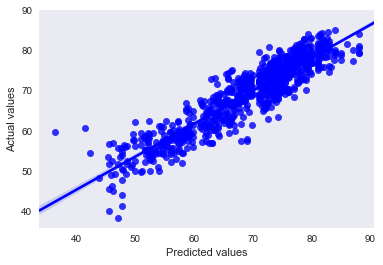

In [76]:
sns.regplot(y_test, pred, color='blue')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

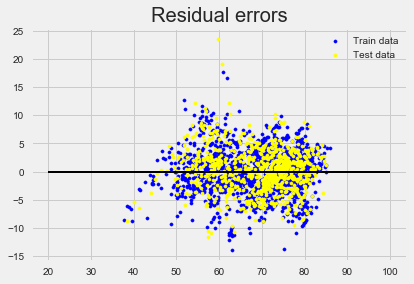

In [77]:
# plot for residual error 

## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "blue", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "yellow", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 20, xmax = 100, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

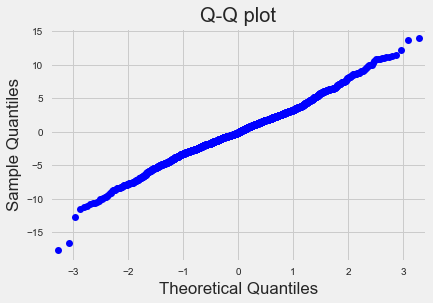

In [78]:
import statsmodels.graphics.gofplots as smq
from matplotlib import pyplot as plt

res = reg.resid # residuals
fig = smq.qqplot(res)
plt.title('Q-Q plot')
plt.show()

In [79]:
lin_MSE = mean_squared_error(pred, y_test)
print("Mean Squared Error:", lin_MSE)

Mean Squared Error: 14.56244753586403


We found, on average, the mean squared error from the residual plot 14.62, meaning that on average we are approx 3.8 years off in our life. This can be possible due to having multiple years for each country results in much of the features look similar.

#### Checking variance inflation factor and there is still multicolinearity between the continents and the country code

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def calculate_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param X: the pandas dataframe
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with features removed
    '''
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    vif_df = pd.Series([variance_inflation_factor(const.values, i) 
               for i in range(const.shape[1])], 
              index=const.columns).to_frame()

    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    print('Features above VIF threshold:\n')
    print(vif_df[vif_df['VIF'] > thresh])

    col_to_drop = list(vif_df.index)

    for i in col_to_drop:
        print('Dropping: {}'.format(i))
        df = df.drop(columns=i)

    return df

#Source: https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

In [81]:
X_vif = X

In [82]:
calculate_vif_(X_vif)

Features above VIF threshold:

Empty DataFrame
Columns: [VIF]
Index: []


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Year,Adult Mortality,Alcohol,Measles,BMI,Total expenditure,HIV/AIDS,GDP,Population,Schooling,pct_infantDeaths,pct_thinness,country_code,Immunization,Developing,Americas,Asia,Europe,Oceania
0,2015,263.0,0.01,1154,19.1,8.16,0.1,584.259210,33736494.0,10.1,7.25,17.25,4,45.333333,1,0,1,0,0
1,2014,271.0,0.01,492,18.6,8.18,0.1,612.696514,327582.0,10.0,7.50,17.50,4,60.666667,1,0,1,0,0
2,2013,268.0,0.01,430,18.1,8.13,0.1,631.744976,31731688.0,9.9,7.75,17.70,4,63.333333,1,0,1,0,0
3,2012,272.0,0.01,2787,17.6,8.52,0.1,669.959000,3696958.0,9.8,8.10,17.95,4,67.000000,1,0,1,0,0
4,2011,275.0,0.01,3013,17.2,7.87,0.1,63.537231,2978599.0,9.5,8.40,18.20,4,68.000000,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2004,723.0,4.36,31,27.1,7.13,33.6,454.366654,12777511.0,9.2,3.45,9.40,716,66.666667,1,0,0,0,0
2812,2003,715.0,4.06,998,26.7,6.52,36.7,453.351155,12633897.0,9.5,3.35,9.85,716,27.333333,1,0,0,0,0
2813,2002,73.0,4.43,304,26.3,6.53,39.8,57.348340,125525.0,10.0,3.25,1.25,716,72.333333,1,0,0,0,0
2814,2001,686.0,1.72,529,25.9,6.16,42.1,548.587312,12366165.0,9.8,3.20,1.65,716,75.666667,1,0,0,0,0


#### Random Forest Regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Create RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train
forest.fit(X_train, y_train)

# Predict
y_train_preds = forest.predict(X_train)
y_preds  = forest.predict(X_test)

# Evaluate
RMSE = np.sqrt(mean_squared_error(y_test, y_preds))
print(f"RMSE: {round(RMSE, 4)}")

r2 = r2_score(y_test, y_preds)
print(f"r2: {round(r2, 4)}")

RMSE: 1.9549
r2: 0.9583


In [84]:
# Calculate the absolute errors
errors = abs(y_preds - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.17 degrees.


In [85]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.19 %.


In [86]:
#!pip install mlxtend

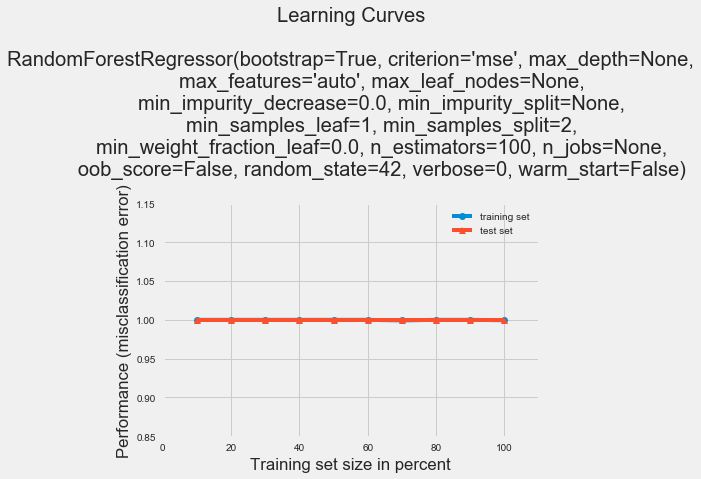

In [87]:
# Learning Curve:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.preprocessing import shuffle_arrays_unison
import numpy as np
plot_learning_curves(X_train, y_train, X_test, y_test, forest)
plt.show()

That looks pretty good! Our model has learned how to predict the life expectancy for the next years with 94% accuracy. The absolute error is 1.14.The linear regression model doesn’t predict all training points perfectly, so the RMSE is greater than 0. Two curves have converged shows that the performance error is stabel and constant for both the training and testing sets.

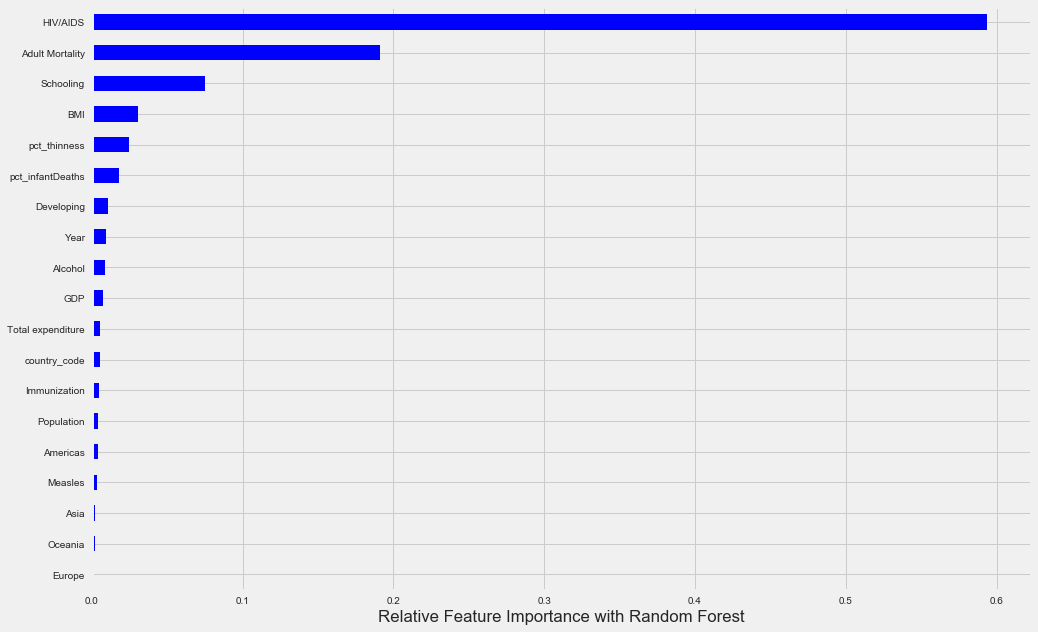

In [88]:
# Plot the important features
features = df_pred.drop('Life expectancy', axis=1)
feat_importances = pd.Series(forest.feature_importances_, index=features.columns)
feat_importances.nlargest(28).sort_values().plot(kind='barh', color='blue', figsize=(15,10))
plt.xlabel('Relative Feature Importance with Random Forest');

After looking at the imortance feature from randon forest, it is concluded that HIV/AID, Income and adult morality have a high influence on the life expectaqncy as compared to the other features. 

The p value for these features from the linear regression are also less than 0.05. So we can build another regression model regression using only these features to see tha results of R square and MSE.

In [89]:
# Building another regression model on the basis of important features from the data set 
# And also based on the p value from regression model.
#data_reg = df_final[['Life expectancy', 'HIV/AIDS', 'Population','Adult Mortality', 'region_code','BMI', 'pct_thinness','pct_infantDeaths','Schooling', 'Year']]
data_reg = df_final[['Life expectancy', 'HIV/AIDS', 'Adult Mortality','Schooling', 'BMI','pct_thinness', 'pct_infantDeaths','Developing','Year', 'Alcohol']]
X = data_reg.drop('Life expectancy', axis=1)
y = data_reg['Life expectancy']
X_train, X_test, y_train , y_test = train_test_split(X,y ,random_state=0 , test_size = 0.3)
X_train.head()

,HIV/AIDS,Adult Mortality,Schooling,BMI,pct_thinness,pct_infantDeaths,Developing,Year,Alcohol
2033,0.1,135.0,14.7,59.9,2.70,0.2,0,2014,0.01
1180,0.1,154.0,11.8,46.9,7.60,3.2,1,2003,0.01
1224,0.1,68.0,15.7,61.6,1.10,0.1,1,2007,2.33
2439,0.1,6.0,15.3,54.6,0.45,0.0,0,2008,10.29
1695,0.1,144.0,0.0,51.9,2.65,0.0,1,2000,0.01


In [90]:
import statsmodels.regression.linear_model as sm
reg_model = sm.OLS(y_train, X_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 6.088e+04
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:43:09   Log-Likelihood:                -5616.9
No. Observations:                1971   AIC:                         1.125e+04
Df Residuals:                    1962   BIC:                         1.130e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
HIV/AIDS            -0.4831      0.023    -21.470      0.000      -0.527      -0.439
Adult Mortality     -0.0182      0.001    -17.589      0.000      -0.020      -0.016
Schooling            0.9738      0.043     22.447      0.000       0.889       1.059
BMI                  0.1522      0.009     16.026      0.000       0.134       0.171
pct_thinness         0.1407      0.034      4.147      0.000       0.074       0.207
pct_infantDeaths    -0.0253      0.008     -3.288      0.001      -0.040      -0.010
Developing          -2.6515      0.325     -8.165      0.000      -3.288      -2.015
Year                 0.0282      0.000     79.387      0.000       0.028       0.029
Alcohol              0.0088      0.032      0.277      0.782      -0.054       0.071
==============================================================================
Omnibus:                       78.851   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.273
Skew:                          -0.147   Prob(JB):                     1.33e-46
Kurtosis:                       4.577   Cond. No.                     6.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Actual values')

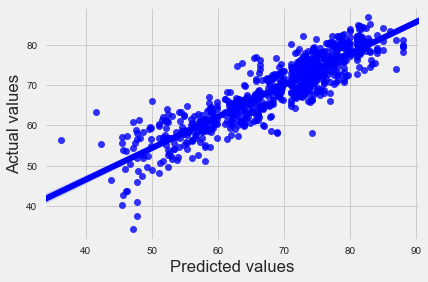

In [91]:
pred_reg = reg_model.predict(X_test)
sns.regplot(y_test, pred_reg, color='blue')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

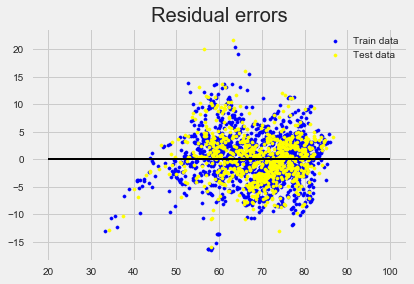

In [92]:
# Plot for residual error 

# Setting plot style 
plt.style.use('fivethirtyeight') 
  
# Plotting residual errors in training data 
plt.scatter(reg_model.predict(X_train), reg_model.predict(X_train) - y_train, 
            color = "blue", s = 10, label = 'Train data') 
  
# Plotting residual errors in test data 
plt.scatter(reg_model.predict(X_test), reg_model.predict(X_test) - y_test, 
            color = "yellow", s = 10, label = 'Test data') 
  
# Plotting line for zero residual error 
plt.hlines(y = 0, xmin = 20, xmax = 100, linewidth = 2) 
  
# Plotting legend 
plt.legend(loc = 'upper right') 
  
# Plot title 
plt.title("Residual errors") 
  
# Function to show plot 
plt.show()